In [1]:
import os
import plaid
import requests
import datetime
import json
import pandas as pd
from dotenv import load_dotenv

%matplotlib inline

In [2]:
load_dotenv()

True

In [3]:
# Helper functions

def pretty_print_response(response):
    """
    This function formats a JSON file to pretty printing it in the screen.
    """
    print(json.dumps(response, indent=4, sort_keys=True))
    

In [4]:
# Extract API keys from environment variables
PLAID_CLIENT_ID = os.getenv("PLAID_CLIENT_ID")
PLAID_SBX_KEY = os.getenv("PLAID_SBX_KEY")
PLAID_PUBLIC_KEY = os.getenv("PLAID_PUBLIC_KEY")

In [5]:
#Create client object
client = plaid.Client(client_id=PLAID_CLIENT_ID, secret=PLAID_SBX_KEY,public_key=PLAID_PUBLIC_KEY, environment='sandbox')

#Get institutions
client.Institutions.get(2)

{'institutions': [{'country_codes': ['US'],
   'credentials': [{'label': 'Username', 'name': 'username', 'type': 'text'},
    {'label': 'Password', 'name': 'password', 'type': 'password'}],
   'has_mfa': True,
   'input_spec': 'fixed',
   'institution_id': 'ins_112060',
   'mfa': ['code', 'list', 'questions', 'selections'],
   'mfa_code_type': 'numeric',
   'name': '1st Bank (Broadus, MT) - Personal',
   'oauth': False,
   'products': ['assets',
    'auth',
    'balance',
    'transactions',
    'income',
    'identity'],
   'routing_numbers': []},
  {'country_codes': ['US'],
   'credentials': [{'label': 'Username', 'name': 'username', 'type': 'text'},
    {'label': 'Password', 'name': 'password', 'type': 'password'}],
   'has_mfa': True,
   'input_spec': 'fixed',
   'institution_id': 'ins_112062',
   'mfa': ['code', 'list', 'questions', 'selections'],
   'mfa_code_type': 'numeric',
   'name': '1st Constitution Bank - Personal',
   'oauth': False,
   'products': ['assets',
    'auth',


In [6]:
#Select an institution for processing 
INSTITUTION_ID = 'ins_109508'

In [7]:
# Create public token to be exchanged for institution access token
create_tkn_response = client.Sandbox.public_token.create(INSTITUTION_ID, ['transactions','income','assets'])


In [8]:
# Exchange public token for access token
exchange_response = client.Item.public_token.exchange(create_tkn_response['public_token'])

# Store access token as variable
access_token = exchange_response['access_token'] 

In [9]:
# Get transactions for institution for specific date range
start_date = '{:%Y-%m-%d}'.format(datetime.datetime.now() + datetime.timedelta(-90))
end_date = '{:%Y-%m-%d}'.format(datetime.datetime.now())

# Get transactions for date range
transaction_response = client.Transactions.get(access_token,start_date,end_date)

# Print JSON output
print(json.dumps(transaction_response['transactions'],indent=4, sort_keys=True))

[
    {
        "account_id": "jnxvQzDzVvCEZZy7dWRbHkpo8jjm7WI1A99dg",
        "account_owner": null,
        "amount": 78.5,
        "authorized_date": null,
        "category": [
            "Recreation",
            "Gyms and Fitness Centers"
        ],
        "category_id": "17018000",
        "date": "2020-07-12",
        "iso_currency_code": "USD",
        "location": {
            "address": null,
            "city": null,
            "country": null,
            "lat": null,
            "lon": null,
            "postal_code": null,
            "region": null,
            "store_number": null
        },
        "merchant_name": "Touchstone",
        "name": "Touchstone Climbing",
        "payment_channel": "in store",
        "payment_meta": {
            "by_order_of": null,
            "payee": null,
            "payer": null,
            "payment_method": null,
            "payment_processor": null,
            "ppd_id": null,
            "reason": null,
            "referen

In [10]:
# Printing the categories for each transaction
for transaction in transaction_response['transactions']:
    print(json.dumps(transaction['category'], indent=4, sort_keys=True))
    

[
    "Recreation",
    "Gyms and Fitness Centers"
]
[
    "Travel",
    "Airlines and Aviation Services"
]
[
    "Food and Drink",
    "Restaurants",
    "Fast Food"
]
[
    "Food and Drink",
    "Restaurants",
    "Coffee Shop"
]
[
    "Food and Drink",
    "Restaurants"
]
[
    "Transfer",
    "Credit"
]
[
    "Travel",
    "Airlines and Aviation Services"
]
[
    "Travel",
    "Taxi"
]
[
    "Food and Drink",
    "Restaurants"
]
[
    "Payment"
]
[
    "Food and Drink",
    "Restaurants",
    "Fast Food"
]
[
    "Shops",
    "Sporting Goods"
]
[
    "Payment",
    "Credit Card"
]
[
    "Travel",
    "Taxi"
]
[
    "Transfer",
    "Debit"
]
[
    "Transfer",
    "Deposit"
]


In [11]:
# Define an empty DataFrame
df = pd.DataFrame({'date':[],'name':[],'amount':[],'category':[]})
df.head()

,date,name,amount,category


In [12]:
# Retrieve all the transactions
output = transaction_response['transactions']
print(output)

[{'account_id': 'jnxvQzDzVvCEZZy7dWRbHkpo8jjm7WI1A99dg', 'account_owner': None, 'amount': 78.5, 'authorized_date': None, 'category': ['Recreation', 'Gyms and Fitness Centers'], 'category_id': '17018000', 'date': '2020-07-12', 'iso_currency_code': 'USD', 'location': {'address': None, 'city': None, 'country': None, 'lat': None, 'lon': None, 'postal_code': None, 'region': None, 'store_number': None}, 'merchant_name': 'Touchstone', 'name': 'Touchstone Climbing', 'payment_channel': 'in store', 'payment_meta': {'by_order_of': None, 'payee': None, 'payer': None, 'payment_method': None, 'payment_processor': None, 'ppd_id': None, 'reason': None, 'reference_number': None}, 'pending': False, 'pending_transaction_id': None, 'transaction_code': None, 'transaction_id': 'mn4v1xlxVvCGeeo6VWKbH1EwoDJX75ILJkkaa', 'transaction_type': 'place', 'unofficial_currency_code': None}, {'account_id': '45X1qmEm81CVmmpoGvy8f4aDyXXWAzidMWWzp', 'account_owner': None, 'amount': -500, 'authorized_date': None, 'category

In [13]:
# Define an empty DataFrame and set the columns as date, name, amount, and category
df = pd.DataFrame(columns=["date", "name", "amount", "category"])

# Retrieve all the transactions
transactions = transaction_response["transactions"]

# Populate the transactions DataFrame with the transactions data
for index, transaction in enumerate(transactions):
    df.loc[index] = [transaction["date"], transaction["name"], transaction["amount"], transaction["category"][0]]

# Display sample data from the DataFrame    
df.head()


,date,name,amount,category
0,2020-07-12,Touchstone Climbing,78.50,Recreation
1,2020-07-12,United Airlines,-500.00,Travel
2,2020-07-11,McDonald's,12.00,Food and Drink
3,2020-07-11,Starbucks,4.33,Food and Drink
4,2020-07-10,SparkFun,89.40,Food and Drink


In [14]:
df.set_index(pd.to_datetime(df['date'])).drop(columns=['date'])

,name,amount,category
date,,,
2020-07-12,Touchstone Climbing,78.50,Recreation
2020-07-12,United Airlines,-500.00,Travel
2020-07-11,McDonald's,12.00,Food and Drink
2020-07-11,Starbucks,4.33,Food and Drink
2020-07-10,SparkFun,89.40,Food and Drink
2020-07-09,INTRST PYMNT,-4.22,Transfer
2020-06-29,United Airlines,500.00,Travel
2020-06-27,Uber 072515 SF**POOL**,6.33,Travel
2020-06-24,Tectra Inc,500.00,Food and Drink


In [16]:
income_response = client.Income.get(access_token)
pretty_print_response(income_response) 

{
    "income": {
        "income_streams": [
            {
                "confidence": 0.99,
                "days": 720,
                "monthly_income": 500,
                "name": "UNITED AIRLINES"
            }
        ],
        "last_year_income": 6500,
        "last_year_income_before_tax": 7893,
        "max_number_of_overlapping_income_streams": 1,
        "number_of_income_streams": 1,
        "projected_yearly_income": 6085,
        "projected_yearly_income_before_tax": 7389
    },
    "request_id": "M50CTgQ77ZcKyDe"
}


In [17]:
print(f"Last Year's income: {income_response['income']['last_year_income_before_tax']}")
print(f"Current monthly income: {income_response['income']['income_streams'][0]['monthly_income']}")
print(f"Projected Year's income: {income_response['income']['projected_yearly_income_before_tax']}")

Last Year's income: 7893
Current monthly income: 500
Projected Year's income: 7389


In [18]:
# Compute the total expenses per category
category_totals = df.groupby("category").sum()["amount"]
category_totals



category
Food and Drink    1105.73
Payment           2103.50
Recreation          78.50
Shops              500.00
Transfer          6845.78
Travel              11.73
Name: amount, dtype: float64

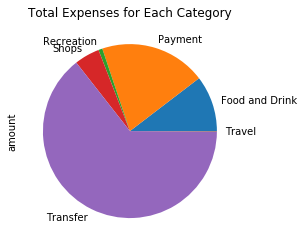

In [19]:
#  NOTE: I cannot plot a pie c hart because there is a negagtive amount for Travel

category_totals.plot.pie(title= "Total Expenses for Each Category")

In [20]:
transactions_per_month = df.reset_index()
transactions_per_month["month"] = pd.DatetimeIndex(transactions_per_month["date"]).month
transactions_per_month = transactions_per_month.groupby("month").sum()

# Display sample data
transactions_per_month

,index,amount
month,,
6,105,10965.23
7,15,-319.99


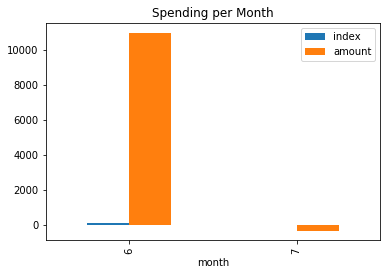

In [21]:
# Create a spending per month bar chart
transactions_per_month.plot.bar(title="Spending per Month") 